In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib widget

In [2]:
# Example 1

In [3]:
dict_of_lists_graph = {1:[2,3,4],
                       2:[3,6],
                       3:[5],
                       4:[10,11],
                       5:[9],
                       6:[4,7],
                       7:[],
                       8:[5],
                       9:[],
                       10:[],
                       11:[]}
G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.Graph)
spring_layout_for_G = nx.spring_layout(G, seed=100)

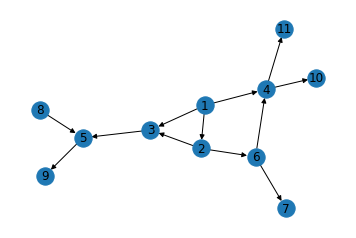

In [4]:
fig = plt.figure()
plt.axis('off')
G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True)

In [5]:
# Centrality measures
degs = nx.degree_centrality(G)
degs_vals = [degs[key] for key in degs.keys()]

katzs = nx.katz_centrality(G)
katzs_vals = [katzs[key] for key in katzs.keys()]

clos = nx.closeness_centrality(G)
clos_vals = [clos[key] for key in clos.keys()]

pageranks = nx.pagerank(G)
pageranks_vals = [pageranks[key] for key in pageranks.keys()]

In [6]:
df = pd.DataFrame()
df['nodeId'] = degs.keys()
df['degc'] = degs_vals
df['katzc'] = katzs_vals
df['closc'] = clos_vals
df['pagerankc'] = pageranks_vals
df

,nodeId,degc,katzc,closc,pagerankc
0,1,0.3,0.268504,0.000000,0.047166
1,2,0.3,0.295354,0.100000,0.060530
2,3,0.3,0.324890,0.200000,0.086254
3,4,0.4,0.325158,0.225000,0.091508
4,5,0.3,0.327843,0.266667,0.160573
5,6,0.3,0.298039,0.133333,0.072891
6,7,0.1,0.298308,0.150000,0.078145
7,8,0.1,0.268504,0.000000,0.047166
8,9,0.1,0.301288,0.227273,0.183654
9,10,0.1,0.301020,0.200000,0.086057


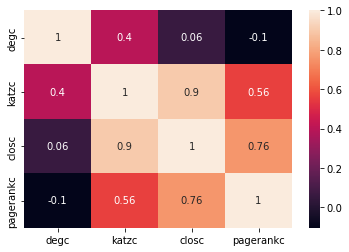

In [7]:
# correlation
cols = list(df.columns)
cols.remove('nodeId')
corr_matr = df[cols].corr()

import seaborn as sns
#correlation matrix
sns.heatmap(corr_matr, annot = True)

In [8]:
# Minmax Normalization
def normalize_pandas_column(df, column):
    return (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [9]:
degc_normed = normalize_pandas_column(df, 'degc')

katzc_normed = normalize_pandas_column(df, 'katzc')

closc_normed = normalize_pandas_column(df, 'closc')

pagerankc_normed = normalize_pandas_column(df, 'pagerankc')

In [10]:
meanc_normed = np.mean([degc_normed, katzc_normed, closc_normed,pagerankc_normed], axis =0)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


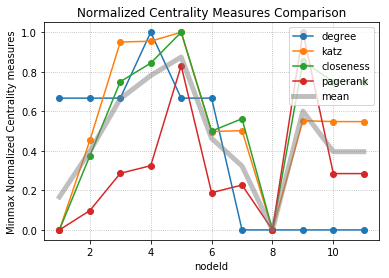

In [11]:
fig = plt.figure()
plt.title('Normalized Centrality Measures Comparison')
plt.plot(list(degs.keys()), degc_normed,'o-', label = 'degree')
plt.plot(list(katzs.keys()), katzc_normed,'o-', label = 'katz')
plt.plot(list(clos.keys()), closc_normed, 'o-', label = 'closeness')
plt.plot(list(pageranks.keys()), pagerankc_normed, 'o-', label = 'pagerank')
plt.plot(list(pageranks.keys()), meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
plt.xlabel('nodeId')
plt.ylabel('Minmax Normalized Centrality measures')
plt.legend(loc = 'best')
plt.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


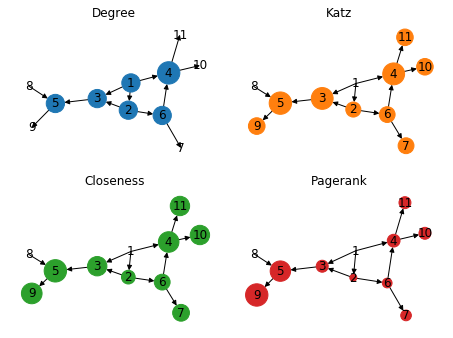

In [12]:
fig, axs = plt.subplots(2,2, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Katz')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')

G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in degc_normed], node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in katzc_normed],node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in closc_normed],node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in pagerankc_normed],node_color = 'tab:red',ax=axs[1,1])

In [13]:
# z score normalization
cols = list(df.columns)
cols.remove('nodeId')
df[cols]

,degc,katzc,closc,pagerankc
0,0.3,0.268504,0.000000,0.047166
1,0.3,0.295354,0.100000,0.060530
2,0.3,0.324890,0.200000,0.086254
3,0.4,0.325158,0.225000,0.091508
4,0.3,0.327843,0.266667,0.160573
5,0.3,0.298039,0.133333,0.072891
6,0.1,0.298308,0.150000,0.078145
7,0.1,0.268504,0.000000,0.047166
8,0.1,0.301288,0.227273,0.183654
9,0.1,0.301020,0.200000,0.086057


In [14]:
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,nodeId,degc,katzc,closc,pagerankc,degc_zscore,katzc_zscore,closc_zscore,pagerankc_zscore
0,1,0.3,0.268504,0.000000,0.047166,0.734847,-1.691666,-1.811952,-1.059196
1,2,0.3,0.295354,0.100000,0.060530,0.734847,-0.289698,-0.641078,-0.735610
2,3,0.3,0.324890,0.200000,0.086254,0.734847,1.252467,0.529796,-0.112707
3,4,0.4,0.325158,0.225000,0.091508,1.632993,1.266487,0.822515,0.014506
4,5,0.3,0.327843,0.266667,0.160573,0.734847,1.406684,1.310379,1.686842
5,6,0.3,0.298039,0.133333,0.072891,0.734847,-0.149501,-0.250786,-0.436293
6,7,0.1,0.298308,0.150000,0.078145,-1.061446,-0.135481,-0.055641,-0.309081
7,8,0.1,0.268504,0.000000,0.047166,-1.061446,-1.691666,-1.811952,-1.059196
8,9,0.1,0.301288,0.227273,0.183654,-1.061446,0.020137,0.849126,2.245717
9,10,0.1,0.301020,0.200000,0.086057,-1.061446,0.006118,0.529796,-0.117491


C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


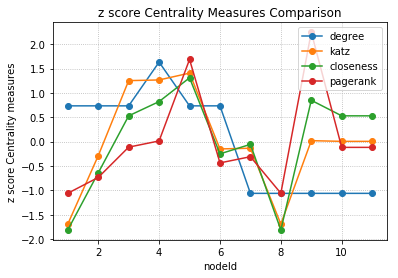

In [15]:
fig = plt.figure()
plt.title('z score Centrality Measures Comparison')
plt.plot(df.nodeId, df.degc_zscore,'o-', label = 'degree')
plt.plot(df.nodeId, df.katzc_zscore,'o-', label = 'katz')
plt.plot(df.nodeId, df.closc_zscore, 'o-', label = 'closeness')
plt.plot(df.nodeId, df.pagerankc_zscore, 'o-', label = 'pagerank')
# plt.plot(df.nodeId, meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
plt.xlabel('nodeId')
plt.ylabel('z score Centrality measures')
plt.legend(loc = 'best')
plt.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


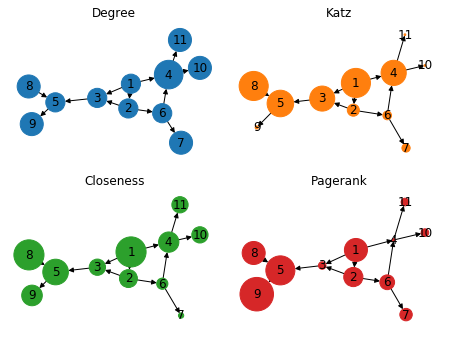

In [16]:
fig, axs = plt.subplots(2,2, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Katz')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')

G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.degc_zscore.abs(), node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.katzc_zscore.abs(), node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.closc_zscore.abs(), node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.pagerankc_zscore.abs(), node_color = 'tab:red',ax=axs[1,1])

In [17]:
# Example 2

In [18]:
dict_of_lists_graph = {1:[2,3,4,5],
                       2:[],
                       3:[],
                       4:[],
                       5:[6,7,8],
                       6:[9,10,11,12],
                       7:[13,14,15],
                       8:[16,17,18,19],
                       9:[],
                       10:[],
                       11:[],
                       12:[],
                      13:[],
                      14:[],
                      15:[],
                      16:[],
                      17:[],
                      18:[],
                      19:[]}
G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.Graph)
spring_layout_for_G = nx.spring_layout(G, seed=2) 

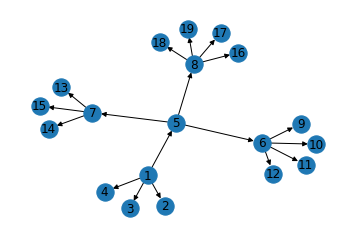

In [19]:
fig, ax = plt.subplots()
ax.axis('off')
G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True)

In [20]:
# Centrality measures
degs = nx.degree_centrality(G)
degs_vals = [degs[key] for key in degs.keys()]

katzs = nx.katz_centrality(G)
katzs_vals = [katzs[key] for key in katzs.keys()]

clos = nx.closeness_centrality(G)
clos_vals = [clos[key] for key in clos.keys()]

pageranks = nx.pagerank(G)
pageranks_vals = [pageranks[key] for key in pageranks.keys()]

In [21]:
df = pd.DataFrame()
df['nodeId'] = degs.keys()
df['degc'] = degs_vals
df['katzc'] = katzs_vals
df['closc'] = clos_vals
df['pagerankc'] = pageranks_vals
df

,nodeId,degc,katzc,closc,pagerankc
0,1,0.222222,0.208000,0.000000,0.041141
1,2,0.055556,0.228800,0.055556,0.049883
2,3,0.055556,0.228800,0.055556,0.049883
3,4,0.055556,0.228800,0.055556,0.049883
4,5,0.222222,0.228800,0.055556,0.049883
5,6,0.277778,0.230880,0.074074,0.055274
6,7,0.222222,0.230880,0.074074,0.055274
7,8,0.277778,0.230880,0.074074,0.055274
8,9,0.055556,0.231088,0.083333,0.052887
9,10,0.055556,0.231088,0.083333,0.052887


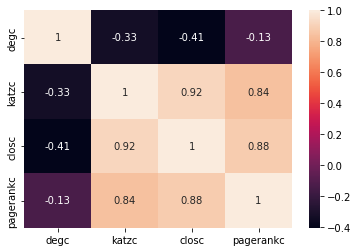

In [22]:
# correlation
cols = list(df.columns)
cols.remove('nodeId')
corr_matr = df[cols].corr()

import seaborn as sns
#correlation matrix
sns.heatmap(corr_matr, annot = True)

In [23]:
# Minmax normalization
degc_normed = normalize_pandas_column(df, 'degc')

katzc_normed = normalize_pandas_column(df, 'katzc')

closc_normed = normalize_pandas_column(df, 'closc')

pagerankc_normed = normalize_pandas_column(df, 'pagerankc')

In [24]:
meanc_normed = np.mean([degc_normed, katzc_normed, closc_normed,pagerankc_normed], axis =0)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


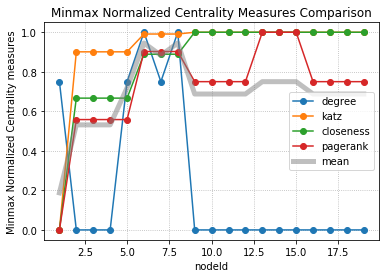

In [25]:
fig, ax = plt.subplots()
plt.title('Minmax Normalized Centrality Measures Comparison')
plt.plot(df.nodeId, degc_normed,'o-', label = 'degree')
plt.plot(df.nodeId, katzc_normed,'o-', label = 'katz')
plt.plot(df.nodeId, closc_normed, 'o-', label = 'closeness')
plt.plot(df.nodeId, pagerankc_normed, 'o-', label = 'pagerank')
plt.plot(df.nodeId, meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
ax.set_xlabel('nodeId')
ax.set_ylabel('Minmax Normalized Centrality measures')
ax.legend(loc = 'best')
ax.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


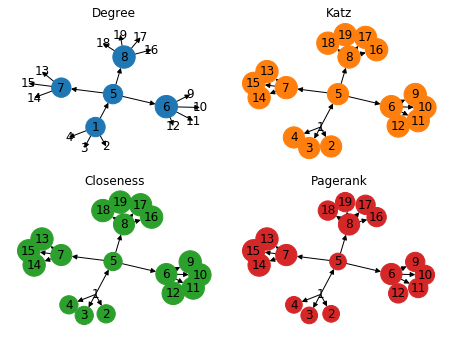

In [26]:
fig, axs = plt.subplots(2,2, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Katz')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')

G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in degc_normed], node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in katzc_normed],node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in closc_normed],node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in pagerankc_normed],node_color = 'tab:red',ax=axs[1,1])

In [27]:
# z score normalization
cols = list(df.columns)
cols.remove('nodeId')
df[cols]

,degc,katzc,closc,pagerankc
0,0.222222,0.208000,0.000000,0.041141
1,0.055556,0.228800,0.055556,0.049883
2,0.055556,0.228800,0.055556,0.049883
3,0.055556,0.228800,0.055556,0.049883
4,0.222222,0.228800,0.055556,0.049883
5,0.277778,0.230880,0.074074,0.055274
6,0.222222,0.230880,0.074074,0.055274
7,0.277778,0.230880,0.074074,0.055274
8,0.055556,0.231088,0.083333,0.052887
9,0.055556,0.231088,0.083333,0.052887


In [28]:
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,nodeId,degc,katzc,closc,pagerankc,degc_zscore,katzc_zscore,closc_zscore,pagerankc_zscore
0,1,0.222222,0.208000,0.000000,0.041141,1.386750,-4.174869,-3.561087,-3.261005
1,2,0.055556,0.228800,0.055556,0.049883,-0.589369,-0.109133,-0.799428,-0.779940
2,3,0.055556,0.228800,0.055556,0.049883,-0.589369,-0.109133,-0.799428,-0.779940
3,4,0.055556,0.228800,0.055556,0.049883,-0.589369,-0.109133,-0.799428,-0.779940
4,5,0.222222,0.228800,0.055556,0.049883,1.386750,-0.109133,-0.799428,-0.779940
5,6,0.277778,0.230880,0.074074,0.055274,2.045457,0.297441,0.121125,0.750039
6,7,0.222222,0.230880,0.074074,0.055274,1.386750,0.297441,0.121125,0.750039
7,8,0.277778,0.230880,0.074074,0.055274,2.045457,0.297441,0.121125,0.750039
8,9,0.055556,0.231088,0.083333,0.052887,-0.589369,0.338098,0.581402,0.072470
9,10,0.055556,0.231088,0.083333,0.052887,-0.589369,0.338098,0.581402,0.072470


C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


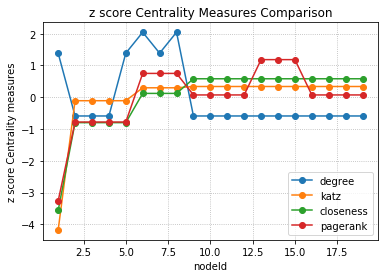

In [29]:
fig = plt.figure()
plt.title('z score Centrality Measures Comparison')
plt.plot(df.nodeId, df.degc_zscore,'o-', label = 'degree')
plt.plot(df.nodeId, df.katzc_zscore,'o-', label = 'katz')
plt.plot(df.nodeId, df.closc_zscore, 'o-', label = 'closeness')
plt.plot(df.nodeId, df.pagerankc_zscore, 'o-', label = 'pagerank')
# plt.plot(df.nodeId, meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
plt.xlabel('nodeId')
plt.ylabel('z score Centrality measures')
plt.legend(loc = 'best')
plt.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


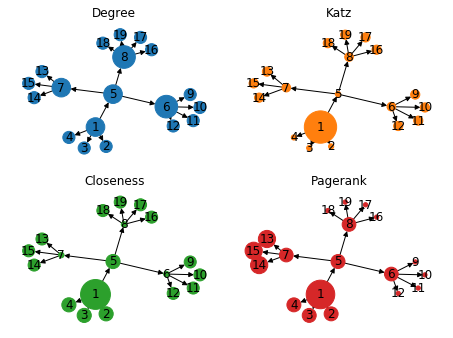

In [30]:
fig, axs = plt.subplots(2,2, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Katz')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')

G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.DiGraph)

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 250*df.degc_zscore.abs(), node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 250*df.katzc_zscore.abs(), node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 250*df.closc_zscore.abs(), node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 250*df.pagerankc_zscore.abs(), node_color = 'tab:red',ax=axs[1,1])

In [31]:
# Example 3

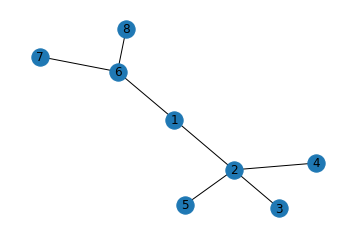

In [32]:
fig, ax = plt.subplots()
ax.axis('off')
dict_of_lists_graph = {1:[2,6],
                       2:[1,3,4,5],
                       3:[2],
                       4:[2],
                       5:[2],
                       6:[1,7,8],
                       7:[6],
                       8:[6]}
G = nx.from_dict_of_lists(dict_of_lists_graph, create_using=nx.Graph)
spring_layout_for_G = nx.spring_layout(G, seed=2) 
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True)

In [33]:
# Centrality measures
degs = nx.degree_centrality(G)
degs_vals = [degs[key] for key in degs.keys()]

eigs = nx.eigenvector_centrality(G)
eigs_vals = [eigs[key] for key in eigs.keys()]

clos = nx.closeness_centrality(G)
clos_vals = [clos[key] for key in clos.keys()]

pageranks = nx.pagerank(G)
pageranks_vals = [pageranks[key] for key in pageranks.keys()]

betweenesss = nx.betweenness_centrality(G)
betweenesss_vals = [betweenesss[key] for key in betweenesss.keys()]

katzs = nx.katz_centrality(G)
katzs_vals = [katzs[key] for key in katzs.keys()]


In [34]:
df = pd.DataFrame()
df['nodeId'] = eigs.keys()
df['degc'] = degs_vals
df['eigc'] = eigs_vals
df['closc'] = clos_vals
df['pagerankc'] = pageranks_vals
df['betweenessc'] = betweenesss_vals
df['katzc'] = katzs_vals
df

,nodeId,degc,eigc,closc,pagerankc,betweenessc,katzc
0,1,0.285714,0.452894,0.583333,0.135479,0.571429,0.367590
1,2,0.571429,0.601497,0.583333,0.270978,0.714286,0.421940
2,3,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
3,4,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
4,5,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
5,6,0.428571,0.371755,0.500000,0.208754,0.523810,0.388394
6,7,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396
7,8,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396


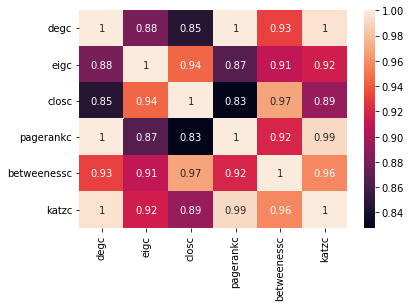

In [35]:
# correlation
cols = list(df.columns)
cols.remove('nodeId')
corr_matr = df[cols].corr()

import seaborn as sns
#correlation matrix
sns.heatmap(corr_matr, annot = True)

In [36]:
# Minmax normalization

In [37]:
def normalize_pandas_column(df, column):
    return (df[column] - df[column].min())/(df[column].max() - df[column].min())

In [38]:
degc_normed = normalize_pandas_column(df, 'degc')

eigc_normed = normalize_pandas_column(df, 'eigc')

closc_normed = normalize_pandas_column(df, 'closc')

pagerankc_normed = normalize_pandas_column(df, 'pagerankc')

betweenessc_normed = normalize_pandas_column(df, 'betweenessc')

katzc_normed = normalize_pandas_column(df, 'katzc')

In [39]:
meanc_normed = np.mean([degc_normed, eigc_normed, closc_normed,pagerankc_normed, betweenessc_normed, katzc_normed], axis =0)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


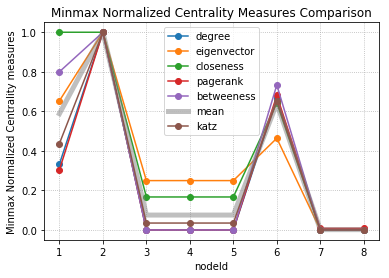

In [40]:
fig, ax = plt.subplots()
plt.title('Minmax Normalized Centrality Measures Comparison')
plt.plot(degs.keys(), degc_normed,'o-', label = 'degree')
plt.plot(eigs.keys(), eigc_normed,'o-', label = 'eigenvector')
plt.plot(clos.keys(), closc_normed, 'o-', label = 'closeness')
plt.plot(pageranks.keys(), pagerankc_normed, 'o-', label = 'pagerank')
plt.plot(betweenesss.keys(), betweenessc_normed, 'o-', label = 'betweeness')
plt.plot(pageranks.keys(), meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
plt.plot(katzs.keys(), katzc_normed, 'o-', label = 'katz')
ax.set_xlabel('nodeId')
ax.set_ylabel('Minmax Normalized Centrality measures')
ax.legend(loc = 'best')
ax.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


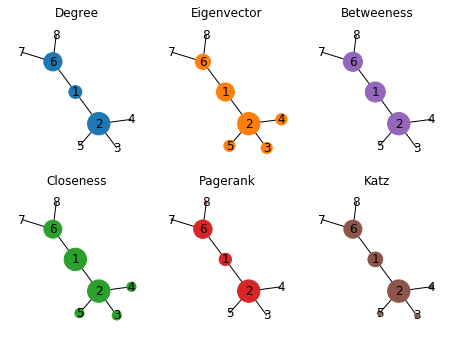

In [41]:
fig, axs = plt.subplots(2,3, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Eigenvector')
axs[0,2].title.set_text('Betweeness')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')
axs[1,2].title.set_text('Katz')

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in degc_normed], node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in eigc_normed],node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in closc_normed],node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in pagerankc_normed],node_color = 'tab:red',ax=axs[1,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in betweenessc_normed],node_color = 'tab:purple',ax=axs[0,2])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = [500.*val for val in katzc_normed],node_color = 'tab:brown',ax=axs[1,2])

In [42]:
# z score normalization
cols = list(df.columns)
cols.remove('nodeId')
df[cols]

,degc,eigc,closc,pagerankc,betweenessc,katzc
0,0.285714,0.452894,0.583333,0.135479,0.571429,0.367590
1,0.571429,0.601497,0.583333,0.270978,0.714286,0.421940
2,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
3,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
4,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750
5,0.428571,0.371755,0.500000,0.208754,0.523810,0.388394
6,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396
7,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396


In [43]:
# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,nodeId,degc,eigc,closc,pagerankc,betweenessc,katzc,degc_zscore,eigc_zscore,closc_zscore,pagerankc_zscore,betweenessc_zscore,katzc_zscore
0,1,0.285714,0.452894,0.583333,0.135479,0.571429,0.367590,0.229416,0.931661,1.528701,0.148235,1.165608,0.456235
1,2,0.571429,0.601497,0.583333,0.270978,0.714286,0.421940,2.064742,2.026839,1.528701,2.065027,1.647929,2.033743
2,3,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750,-0.688247,-0.343280,-0.569516,-0.688462,-0.763674,-0.671066
3,4,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750,-0.688247,-0.343280,-0.569516,-0.688462,-0.763674,-0.671066
4,5,0.142857,0.279900,0.388889,0.076332,0.000000,0.328750,-0.688247,-0.343280,-0.569516,-0.688462,-0.763674,-0.671066
5,6,0.428571,0.371755,0.500000,0.208754,0.523810,0.388394,1.147079,0.333673,0.629465,1.184797,1.004835,1.060084
6,7,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396,-0.688247,-1.131166,-0.989160,-0.666335,-0.763674,-0.768431
7,8,0.142857,0.172994,0.350000,0.077896,0.000000,0.325396,-0.688247,-1.131166,-0.989160,-0.666335,-0.763674,-0.768431


C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


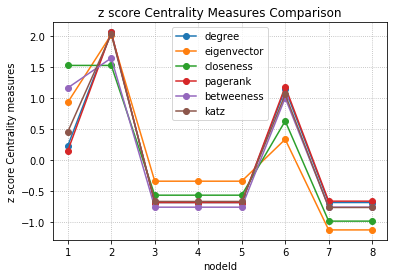

In [44]:
fig = plt.figure()
plt.title('z score Centrality Measures Comparison')
plt.plot(df.nodeId, df.degc_zscore,'o-', label = 'degree')
plt.plot(df.nodeId, df.eigc_zscore,'o-', label = 'eigenvector')
plt.plot(df.nodeId, df.closc_zscore, 'o-', label = 'closeness')
plt.plot(df.nodeId, df.pagerankc_zscore, 'o-', label = 'pagerank')
plt.plot(df.nodeId, df.betweenessc_zscore, 'o-', label = 'betweeness')
plt.plot(df.nodeId, df.katzc_zscore, 'o-', label = 'katz')
# plt.plot(df.nodeId, meanc_normed, '-', label = 'mean', lw = 5, color = 'grey', alpha = 0.5)
plt.xlabel('nodeId')
plt.ylabel('z score Centrality measures')
plt.legend(loc = 'best')
plt.grid(ls = ':')

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


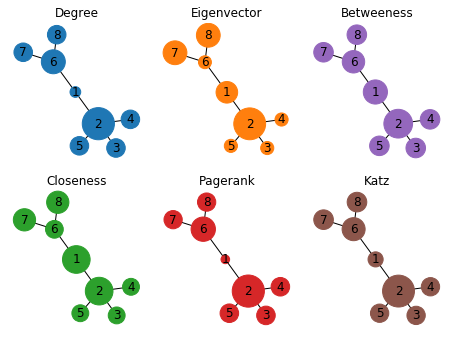

In [45]:
fig, axs = plt.subplots(2,3, figsize=(6.4, 4.8), tight_layout=True)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[0,0].title.set_text('Degree')
axs[0,1].title.set_text('Eigenvector')
axs[0,2].title.set_text('Betweeness')
axs[1,0].title.set_text('Closeness')
axs[1,1].title.set_text('Pagerank')
axs[1,2].title.set_text('Katz')

nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.degc_zscore.abs(), node_color = 'tab:blue',ax=axs[0,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.eigc_zscore.abs(), node_color = 'tab:orange',ax=axs[0,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.closc_zscore.abs(), node_color = 'tab:green',ax=axs[1,0])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500*df.pagerankc_zscore.abs(), node_color = 'tab:red',ax=axs[1,1])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500.*df.betweenessc_zscore.abs(),node_color = 'tab:purple',ax=axs[0,2])
nx.draw_networkx(G,pos=spring_layout_for_G,with_labels=True,node_size = 500.*df.katzc_zscore.abs(),node_color = 'tab:brown',ax=axs[1,2])